# Day 7 End of Day Activity

[session link]()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_plant = "https://prism.oregonstate.edu/projects/phm_data/phzm_us_zipcode_2023.csv"
url_survey = "https://prism.oregonstate.edu/projects/public/phm/2012/phm_us_zipcode_2012.csv"
url_zip = "http://uszipcodelist.com/zip_code_database.csv"

In [3]:
plant_df = pd.read_csv(url_plant)

In [4]:
survey_df = pd.read_csv(url_survey)

In [5]:
zip_df = pd.read_csv(url_zip)

In [10]:
plant_df.head()

,zipcode,zone,trange,zonetitle
0,501,7b,5 to 10,7b: 5 to 10
1,544,7b,5 to 10,7b: 5 to 10
2,1001,6b,-5 to 0,6b: -5 to 0
3,1002,6a,-10 to -5,6a: -10 to -5
4,1003,6a,-10 to -5,6a: -10 to -5


In [8]:
survey_df.head()

,zipcode,zone,trange,zonetitle
0,1001,6a,-10 to -5,6a: -10 to -5
1,1002,5b,-15 to -10,5b: -15 to -10
2,1003,5b,-15 to -10,5b: -15 to -10
3,1004,5b,-15 to -10,5b: -15 to -10
4,1005,5b,-15 to -10,5b: -15 to -10


In [6]:
zip_df.head(10)

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,501,UNIQUE,Holtsville,NaN,I R S Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,384,NaN
1,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,0,NaN
2,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,"787,939",18.16,-66.72,NaN,US,0,0,NaN
3,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,787,18.38,-67.18,NaN,US,0,0,NaN
4,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787,18.43,-67.15,NaN,US,0,0,NaN
5,604,PO BOX,Aguadilla,Ramey,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
6,605,PO BOX,Aguadilla,NaN,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
7,606,STANDARD,Maricao,NaN,Urb San Juan Bautista,PR,Maricao,America/Puerto_Rico,"787,939",18.18,-66.98,NaN,US,0,0,NaN
8,610,STANDARD,Anasco,NaN,"Brisas De Anasco, Est De Valle Verde, Jard De ...",PR,NaN,NaN,787,18.28,-67.14,NaN,US,0,0,NaN
9,611,PO BOX,Angeles,NaN,NaN,PR,NaN,NaN,NaN,18.28,-66.79,NaN,US,0,0,"no NWS data,"


You may have noticed that the zipcodes were read in as integers rather than strings, and therefore might not be 5 digits long. Ensure the zipcode or zip column in all datasets is a 5-character string, filling in any zeros that were dropped.

In [19]:
# 5 character zip codes
zip_df['zip'] = pd.Series(zip_df['zip'], dtype = 'string')
zip_df.dtypes

zip                     string[python]
type                            object
primary_city                    object
acceptable_cities               object
unacceptable_cities             object
state                           object
county                          object
timezone                        object
area_codes                      object
latitude                       float64
longitude                      float64
world_region                    object
country                         object
decommissioned                   int64
estimated_population             int64
notes                           object
dtype: object

In [6]:
# fill the zeroes
zip_df['zip'] = zip_df['zip'].astype('str').str.zfill(5)
plant_df['zip'] = plant_df['zipcode'].astype('str').str.zfill(5)
survey_df['zip'] = survey_df['zipcode'].astype('str').str.zfill(5)

In [7]:
# year column
survey_df['year'] = 2012
survey_df.head()

plant_df['year'] = 2023
plant_df.head()

,zipcode,zone,trange,zonetitle,zip,year
0,501,7b,5 to 10,7b: 5 to 10,00501,2023
1,544,7b,5 to 10,7b: 5 to 10,00544,2023
2,1001,6b,-5 to 0,6b: -5 to 0,01001,2023
3,1002,6a,-10 to -5,6a: -10 to -5,01002,2023
4,1003,6a,-10 to -5,6a: -10 to -5,01003,2023


In [8]:
# concatenate the data frames
join_df = pd.concat([plant_df, survey_df])
np.unique(join_df['year'])
join_df.dtypes

zipcode       int64
zone         object
trange       object
zonetitle    object
zip          object
year          int64
dtype: object

In [37]:
min_max = join_df['trange'].astype('str').str.split(" to ")

In [9]:
# Split the trange string and get the first (min) and last (max) pieces of it
join_df['trange_min'] = join_df['trange'].str.split().str.get(0).astype(int)
join_df['trange_max'] = join_df['trange'].str.split().str.get(-1).astype(int)
           
join_df = join_df.drop('trange', axis='columns')

## 2. Exploration and visualization

On average, how much has the minimum temperature in a zip code changed from 2012 to 2023?

Merge together the combined plant hardiness dataset and the zipcode dataset by zipcode. This will give us more informtaion in the plant hardiness dataset, such as the latitude and longitude for each zipcode.

Create two scatter plot where the x axis is the longitude, the y axis is the latitude, the color is based on the minimum temperature in 2012 for one and 2023 for the other. Only look at longitude < -60.

Now create a single scatter plot where you look at the difference between the minimum temperature in 2012 and 2023. Only look at longitude < -60. Color any zipcodes where you do not have information from both years in grey.

Create a bar plot showing the top 10 states where the average minimum temperature increased the most. Label your axes appropriately.

In [39]:
# On average, how much has the minimum temperature in a zip code changed from 2012 to 2023?
join_df.groupby('year')['trange_min'].mean()

year
2012   -1.899887
2023    1.017259
Name: trange_min, dtype: float64

In [10]:
# Get the mean of the minimum temperatures 
mean_2023 = join_df[join_df['year'] == 2023]['trange_min'].mean()
mean_2012 = join_df[join_df['year'] == 2012]['trange_min'].mean()

# Print the difference between the two means
print(mean_2023 - mean_2012)

2.917145601720649


In [11]:
# Merge together the combined plant hardiness dataset and the zipcode dataset by zipcode. This will give us more informtaion in the plant hardiness dataset, such as the latitude and longitude for each zipcode.
zip_df = zip_df.rename(columns= {'zip' : 'zipcode'})
zip_df.head()

,zipcode,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,00501,UNIQUE,Holtsville,NaN,I R S Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,384,NaN
1,00544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,0,NaN
2,00601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,"787,939",18.16,-66.72,NaN,US,0,0,NaN
3,00602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,787,18.38,-67.18,NaN,US,0,0,NaN
4,00603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787,18.43,-67.15,NaN,US,0,0,NaN


In [13]:
zip_df['zipcode'] = pd.Series(zip_df['zipcode'], dtype = 'string')
join_df['zipcode'] = pd.Series(join_df['zipcode'], dtype = 'string')

In [14]:
merge_df = pd.merge(join_df, zip_df, on='zipcode', how='inner')
merge_df.shape

(74393, 22)

<Axes: xlabel='longitude', ylabel='latitude'>

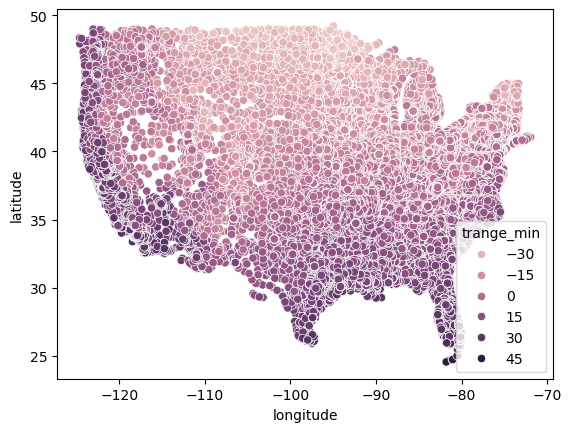

In [15]:
# Create two scatter plot where the x axis is the longitude, the y axis is the latitude, the color is based on the minimum temperature in 2012 for one and 2023 for the other. Only look at longitude < -60.
long_df = merge_df[merge_df['longitude'] < -60]

sns.scatterplot(data=long_df[long_df['year'] == 2023], x='longitude', y='latitude', hue='trange_min')

<Axes: xlabel='longitude', ylabel='latitude'>

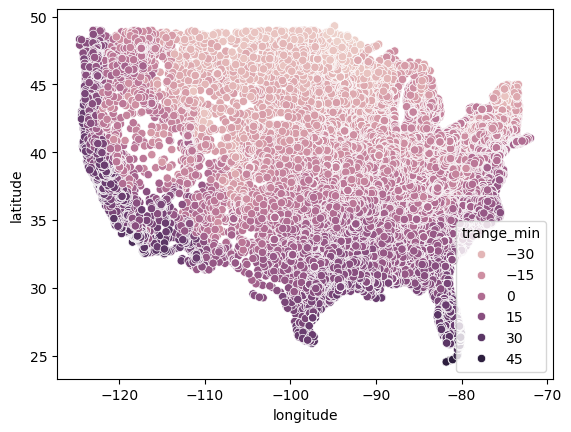

In [46]:
sns.scatterplot(data=long_df[long_df['year'] == 2012], x='longitude', y='latitude', hue='trange_min')

In [16]:
# Now create a single scatter plot where you look at the difference between the minimum temperature in 2012 and 2023. Only look at longitude < -60. Color any zipcodes where you do not have information from both years in grey.
min_2012 = merge_df[merge_df['year'] == 2012]['trange_min']
min_2023 = merge_df[merge_df['year'] == 2023]['trange_min']

# merge_df['temp_diff'] = (merge_df['trange_min'])
min_2023 - min_2012

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
74388   NaN
74389   NaN
74390   NaN
74391   NaN
74392   NaN
Name: trange_min, Length: 74393, dtype: float64

In [20]:
new_merge = pd.merge(plant_df, survey_df, on='zipcode', how='inner')
new_merge.tail()

,zipcode,zone_x,trange_x,zonetitle_x,zip_x,year_x,trange_min_x,trange_max_x,zone_y,trange_y,zonetitle_y,zip_y,year_y,trange_min_y,trange_max_y
39894,99363,7b,5 to 10,7b: 5 to 10,99363,2023,5,10,7a,0 to 5,7a: 0 to 5,99363,2012,0,5
39895,99371,7a,0 to 5,7a: 0 to 5,99371,2023,0,5,6b,-5 to 0,6b: -5 to 0,99371,2012,-5,0
39896,99401,7a,0 to 5,7a: 0 to 5,99401,2023,0,5,6b,-5 to 0,6b: -5 to 0,99401,2012,-5,0
39897,99402,7a,0 to 5,7a: 0 to 5,99402,2023,0,5,7a,0 to 5,7a: 0 to 5,99402,2012,0,5
39898,99403,7b,5 to 10,7b: 5 to 10,99403,2023,5,10,7b,5 to 10,7b: 5 to 10,99403,2012,5,10


In [19]:
plant_df['trange_min'] = plant_df['trange'].str.split().str.get(0).astype(int)
plant_df['trange_max'] = plant_df['trange'].str.split().str.get(-1).astype(int)

survey_df['trange_min'] = survey_df['trange'].str.split().str.get(0).astype(int)
survey_df['trange_max'] = survey_df['trange'].str.split().str.get(-1).astype(int)

In [22]:
new_merge['trange_diff'] = (new_merge['trange_min_x'] - new_merge['trange_min_y'])
new_merge.head()

,zipcode,zone_x,trange_x,zonetitle_x,zip_x,year_x,trange_min_x,trange_max_x,zone_y,trange_y,zonetitle_y,zip_y,year_y,trange_min_y,trange_max_y,trange_diff
0,1001,6b,-5 to 0,6b: -5 to 0,01001,2023,-5,0,6a,-10 to -5,6a: -10 to -5,01001,2012,-10,-5,5
1,1002,6a,-10 to -5,6a: -10 to -5,01002,2023,-10,-5,5b,-15 to -10,5b: -15 to -10,01002,2012,-15,-10,5
2,1003,6a,-10 to -5,6a: -10 to -5,01003,2023,-10,-5,5b,-15 to -10,5b: -15 to -10,01003,2012,-15,-10,5
3,1004,6a,-10 to -5,6a: -10 to -5,01004,2023,-10,-5,5b,-15 to -10,5b: -15 to -10,01004,2012,-15,-10,5
4,1005,6a,-10 to -5,6a: -10 to -5,01005,2023,-10,-5,5b,-15 to -10,5b: -15 to -10,01005,2012,-15,-10,5


In [25]:
new_merge['zipcode'] = new_merge['zipcode'].astype('str').str.zfill(5)


In [26]:
final_merge = pd.merge(new_merge, zip_df, on='zipcode', how='inner')
final_merge.head()

,zipcode,zone_x,trange_x,zonetitle_x,zip_x,year_x,trange_min_x,trange_max_x,zone_y,trange_y,...,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,01001,6b,-5 to 0,6b: -5 to 0,01001,2023,-5,0,6a,-10 to -5,...,Hampden County,America/New_York,413,42.06,-72.61,NaN,US,0,14021,NaN
1,01002,6a,-10 to -5,6a: -10 to -5,01002,2023,-10,-5,5b,-15 to -10,...,Hampshire County,America/New_York,413,42.37,-72.52,NaN,US,0,16532,NaN
2,01003,6a,-10 to -5,6a: -10 to -5,01003,2023,-10,-5,5b,-15 to -10,...,Hampshire County,America/New_York,413,42.37,-72.52,NaN,US,0,0,NaN
3,01004,6a,-10 to -5,6a: -10 to -5,01004,2023,-10,-5,5b,-15 to -10,...,Hampshire County,America/New_York,413,42.37,-72.52,NaN,US,0,742,NaN
4,01005,6a,-10 to -5,6a: -10 to -5,01005,2023,-10,-5,5b,-15 to -10,...,Worcester County,America/New_York,978,42.42,-72.10,NaN,US,0,3935,NaN


<Axes: xlabel='longitude', ylabel='latitude'>

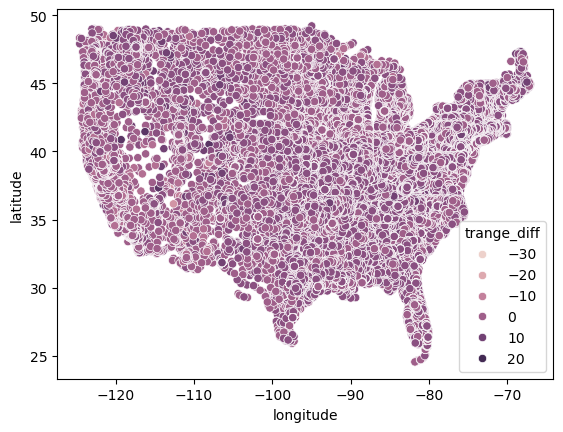

In [30]:
sns.scatterplot(data=final_merge[final_merge['longitude'] < -60], x='longitude', y='latitude', hue='trange_diff')

In [52]:
# # Find the difference in minimum temperature between 2023 and 2012
# df_diff = df_filtered.pivot_table(index=['zipcode', 'latitude', 'longitude'], 
#                                   columns='year', values='trange_min').reset_index()
# df_diff['temp_diff'] = df_diff[2023] - df_diff[2012]

# # Create a scatter plot showing the difference
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_diff, x='longitude', y='latitude', hue='temp_diff', 
#                 palette='coolwarm', s=10, edgecolor='gray', legend='full')
# plt.title('Temperature Difference (2023 - 2012) by Latitude and Longitude')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend(title='Temp Difference')
# plt.show()

36899    5
36900    5
36901    5
36902    5
36903    5
Name: trange_min, dtype: int64
